## Simulation of Prices of Coupon-Bearing Bonds using CIR Interest Rate Model

####  make sure you've downloaded 'erk.py'

In [4]:
import numpy as np
import pandas as pd
import erk as erk
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
a_0=0.75  #my cash on hand today

#simulate Zero_coupon bond prices in 10 years.
rates, bond_prices= erk.cir(n_years=10, r_0=0.03, b=0.03, n_scenarios=10)
liabilities= bond_prices #my liability is simply the ZCB
zcbond_10= pd.Series(data=[1], index=[10])
zc_0=erk.pv(zcbond_10,r=0.03)
n_bonds= a_0/zc_0
av_zc_bonds=n_bonds.iloc[0]*bond_prices
av_cash = a_0*(rates/12+1).cumprod()

Text(0, 0.5, 'Interest Rate')

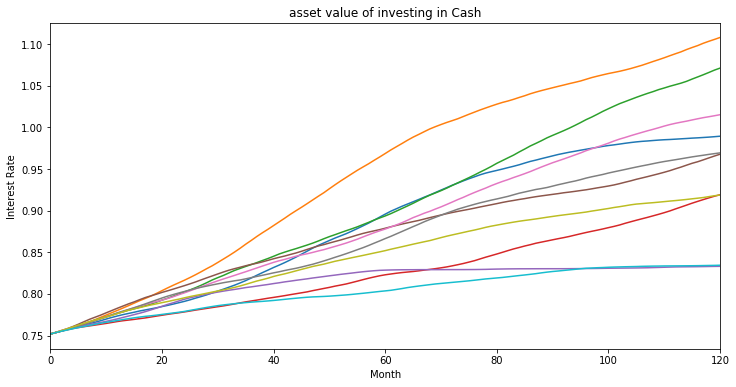

In [38]:
ax=av_cash.plot(legend=False, figsize=(12,6),title="asset value of investing in Cash")
ax.set_xlabel("Month")
ax.set_ylabel("Interest Rate")
## the evolution of my cash asset for different scenarios (10years/ 120 months)

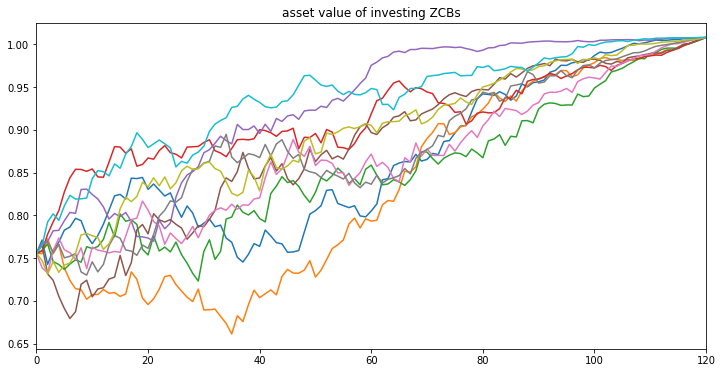

In [39]:
av_zc_bonds.plot(legend=False, figsize=(12,6),title="asset value of investing ZCBs")

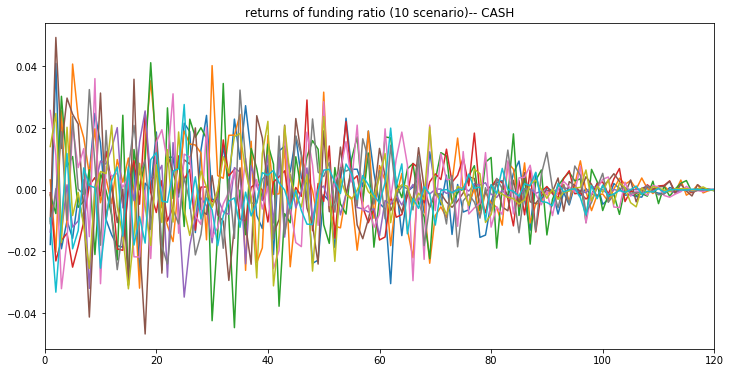

In [42]:
(av_cash/liabilities).pct_change().plot(title="returns of funding ratio (10 scenario)-- CASH",legend=False, figsize=(12,6))

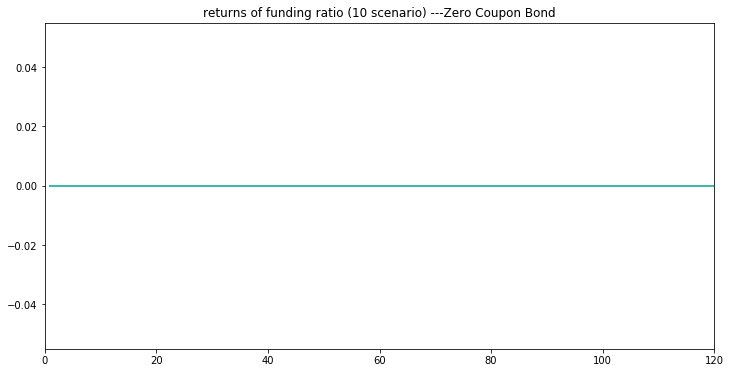

In [43]:
(av_zc_bonds/liabilities).pct_change().plot(title="returns of funding ratio (10 scenario) ---Zero Coupon Bond",legend=False, figsize=(12,6))

In [45]:
a_0 = 0.50
rates, bond_prices = erk.cir(n_scenarios=10000, r_0=0.03, b=0.03 )
liabilities = bond_prices
zc_0=erk.pv(zcbond_10, 0.03)
n_bonds= a_0/ zc_0
av_zc_bonds= n_bonds * bond_prices
av_cash = a_0 * (rates/12+1).cumprod()

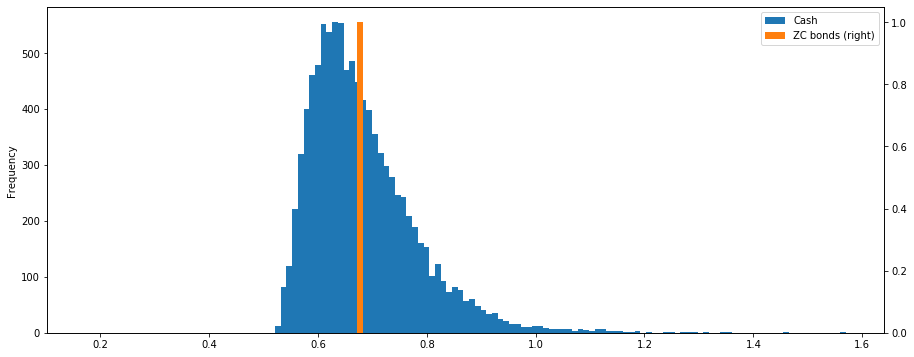

In [46]:
## see the spread of final funding ratio 
# (zc bonds will always end up with funding_ratio=1.0)

tfr_cash= av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds= av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax= tfr_cash.plot.hist(label="Cash",figsize=(15,6),bins=100,legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label="ZC bonds",bins=100, legend=True,secondary_y=True)

## Now, Simulation of Regular Bonds


In [47]:
rates, zc_prices= erk.cir(10,500,b=0.03, r_0=0.03) # 10 yr interest rate in a monthly basis
rates.head() 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.034421,0.027356,0.027907,0.023910,0.030388,0.031042,0.034500,0.028536,0.029817,0.029791,...,0.027513,0.034550,0.028945,0.034681,0.028674,0.029109,0.031394,0.034519,0.031684,0.032281
2,0.029361,0.025506,0.028188,0.025188,0.032466,0.029941,0.034456,0.027566,0.029704,0.027098,...,0.024440,0.031371,0.025925,0.031338,0.029559,0.026907,0.034129,0.037906,0.033898,0.028572
3,0.031928,0.029745,0.028500,0.025274,0.031605,0.030189,0.036225,0.026500,0.034443,0.029343,...,0.023156,0.027723,0.022868,0.031804,0.028266,0.030123,0.034779,0.034923,0.036591,0.030214
4,0.033710,0.027339,0.027556,0.029447,0.032342,0.031739,0.030758,0.025560,0.031947,0.027624,...,0.023494,0.026204,0.019799,0.033189,0.030866,0.027099,0.033768,0.032788,0.041812,0.028816


#### Now, use the dataframe 'rates' to generate prices of 10 yr bonds, and plot all paths

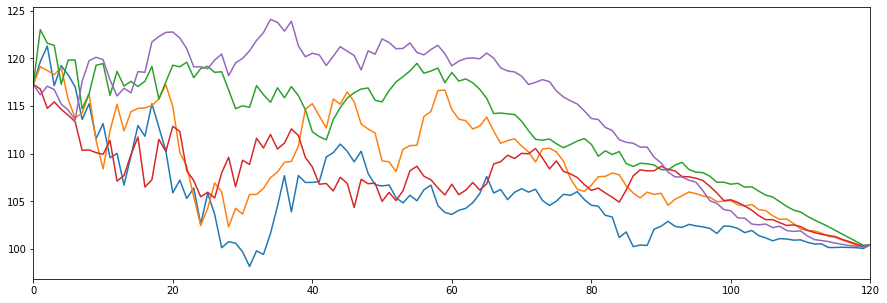

In [49]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))
price_10= erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])

#### now generate the 10 yr bond return.

In [50]:
btr= erk.bond_total_return(price_10,100, 0.05, 12)
#erk.annualize_rets(btr,12)*100

#### let's plot the total bond return over 10 yr (only 1 scenario here)

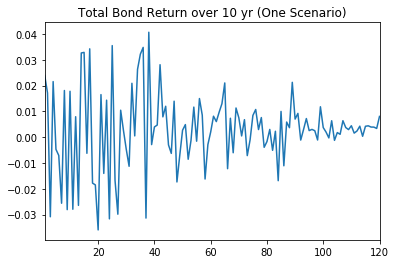

In [53]:
btr[[1]].plot(legend=False, title="Total Bond Return over 10 yr (One Scenario)")

#### Now, run simulations of 30 yr bond in 10 yr on 4 scenarios, see how 30 yr bond prices vary during this 10 yrs

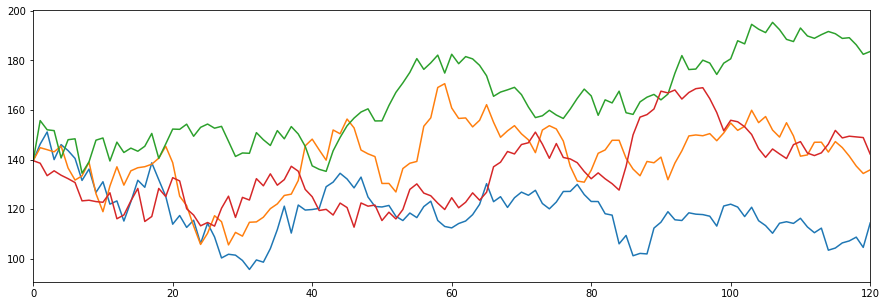

In [54]:
price_30= erk.bond_price(30,100,0.05, 12, rates[[1,2,3,4]])
price_30.plot(legend=False, figsize=(15,5))

##### That's why sometimes bonds are not a safe asset to invest, just by looking at the large dispersion of 30-yr-bond prices in 10 yr

### Fixed_Mix_GHP: 60/40 10yrBond/30yrBond Allocation / statistics

In [61]:
rets_30=erk.bond_total_return(price_30, 100, .05, 12)
rets_10=erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds= .6*rets_10+.4*rets_30   ## assume we rebalance every month
mean_rets_bonds= rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Corner_Fisher Var (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.037713,0.039814,0.180853,3.417094,0.014979,0.020868,0.188508,-0.066611


### Fixed_Mix_Allocation: 70/30 GBMEquity/GHP Allocation / statistics

In [62]:
price_eq=erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
rets_eq= price_eq.pct_change().dropna()
rets=0.7*rets_eq+ .3* rets_bonds
rets_mean= rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Corner_Fisher Var (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.081955,0.058988,0.024555,2.762871,0.021126,0.027541,0.8572,-0.049293
